In [2]:
# Importing necessary libraries to read and handle WRF output files
import xarray as xr
from glob import glob

In [3]:
#  Getting a sorted list of WRF output files
files = sorted(glob("./wrf_outputs/wrfout_d01_*"))

In [4]:
#  Opening and concatenating WRF output files along the Time dimension
datasets = [xr.open_dataset(f) for f in files]
ds = xr.concat(datasets, dim="Time")

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

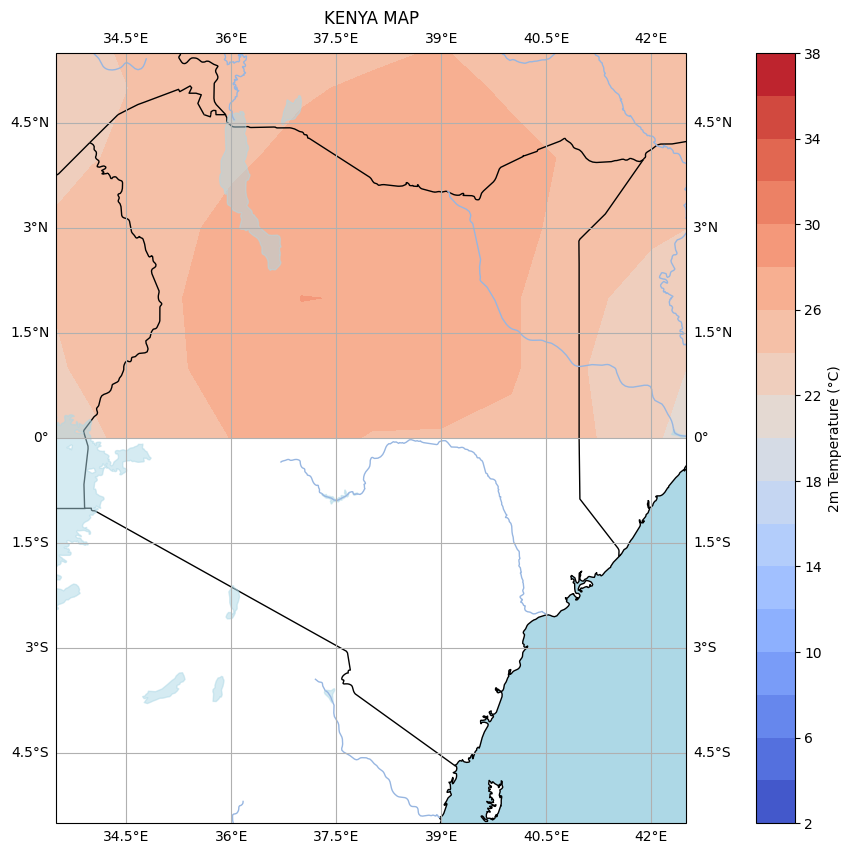

In [ ]:
fig = plt.figure(figsize=(18, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([33.5, 42.5, -5.5, 5.5], crs=ccrs.PlateCarree())

# cf = ax.contourf(ds["T2"].isel(Time=15) - 273.15,
#                  levels=20,
#                  cmap='coolwarm',
#                  transform=ccrs.PlateCarree())
# plt.colorbar(cf, ax=ax, orientation='vertical', label='2m Temperature (°C)')


ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cfeature.LAKES, alpha=0.5, edgecolor='lightblue', facecolor='lightblue')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)

plt.title("KENYA MAP")
plt.show()